# Cours 8 - Clustering

Dans les cours précédents nous avons pu explorer les techniques de machine learning supervisé, aujourd'hui nous allons explorer les techniques de machine learning non-supervisé grâce au clustering. 
Le but du cours sera donc d'identifier un certain nombre de groupes sur des données non labélisées.

Sources:
* https://www.youtube.com/watch?v=mEGYznC6F9s 
* https://www.kaggle.com/code/prashant111/k-means-clustering-with-python/notebook
* https://www.youtube.com/watch?v=_UVHneBUBW0
* https://www.youtube.com/watch?v=FD4DeN81ODY
* https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis

## Partie 1 - K-means Clustering

Tout d'abord explorons le fonctionnement du clustering avec l'algorithme K-means. 

**Exercice 1:** A partir de la documentation [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), décrivez avec vos mots les paramètres principaux de l'algorithme K-means.

In [380]:
# K = Le nombre de centroïde 
# n_init = Le nombre de fois ou l'agorythme vas run pour trouver le meilleur centroïde
# max_iter = Le nombre maximum d'itération


**Exercice 2:** A partir du [dataset sur le cancer du sein](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data), entrainez un algorithme K-means en 2 dimensions sur les colonnes `smoothness-mean` et `area_worst`. Présentez un scatterplot montrant les clusters que l'agorithme à identifié ainsi que les centroides des clusters. Présentez également les paramètres utilisés pour entrainer le modèle. 

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
 
data = pd.read_csv('data.csv')


**Créer les variables**

In [382]:
X = data['smoothness_mean']
Y = data['area_worst']

**Normalisation**

In [383]:
X = (X - X.min()) / (X.max() - X.min())
Y = (Y - Y.min()) / (Y.max() - Y.min())

**Afficher le plot**

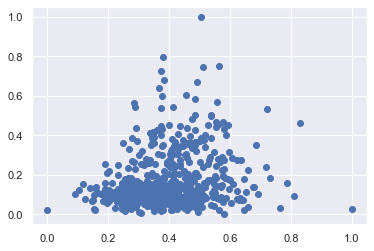

In [384]:
plt.scatter(X,Y)
plt.show()

In [385]:

data_set = np.dstack((X,Y))
data_set = data_set[0]
model = KMeans(3).fit(data_set)
	
print(model.cluster_centers_)

[[0.49948177 0.12000491]
 [0.44390221 0.41517799]
 [0.28957207 0.11207389]]


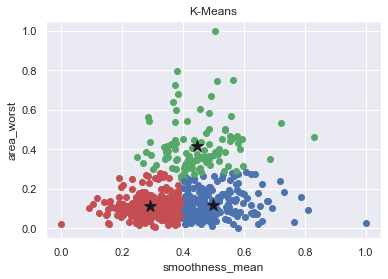

In [386]:
centroids = model.cluster_centers_

for point in data_set:
    if model.predict(point.reshape(1,-1)) == [0]:
        plt.scatter(point[0], point[1], c='b')
    elif model.predict(point.reshape(1,-1)) == [1]:
        plt.scatter(point[0], point[1], c='g')
    elif model.predict(point.reshape(1,-1)) == [2]:
        plt.scatter(point[0], point[1], c='r')

# do label and title
plt.title('K-Means')
plt.xlabel('smoothness_mean')
plt.ylabel('area_worst')


plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150, c='k')
plt.show()
 

## Partie 2 - Elbow Method
Dans cette partie nous allons explorer la elbow method qui nous permettera de choisir quel nombre de clusters semble optimal. 

**Exercice 3:** Creez un line plot nous montrant l'évolution de la distortion du modèles selon le nombre de clusters choisis. L'attribut du modèle `intertia_` sera surement utile. 
Quel semble le meilleur nombre de clusters pour nos données ?

In [387]:
data = pd.read_csv('data.csv')
data = data[['smoothness_mean','area_worst']]
df = pd.DataFrame(data)



In [388]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

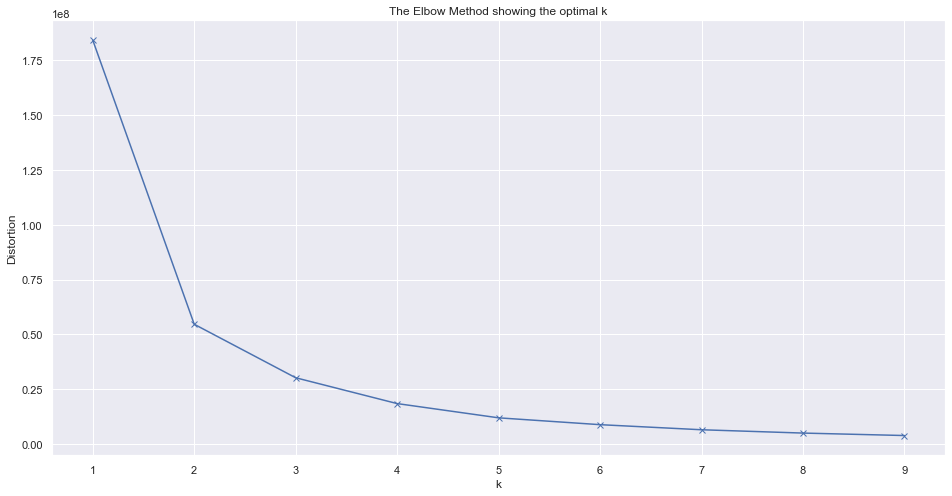

In [389]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show() 

**Exercice 4:** Réitérez l'exercice 2 avec le nombre de clusters optimal trouvez grâce à l'elbow method.

In [390]:

data_set = np.dstack((X,Y))
data_set = data_set[0]
model = KMeans(2).fit(data_set)
	
print(model.cluster_centers_)

[[0.36701516 0.10802121]
 [0.48151346 0.36730785]]


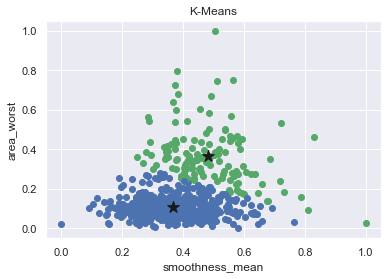

In [391]:
centroids = model.cluster_centers_

for point in data_set:
    if model.predict(point.reshape(1,-1)) == [0]:
        plt.scatter(point[0], point[1], c='b')
    elif model.predict(point.reshape(1,-1)) == [1]:
        plt.scatter(point[0], point[1], c='g')
    elif model.predict(point.reshape(1,-1)) == [2]:
        plt.scatter(point[0], point[1], c='r')

# do label and title
plt.title('K-Means')
plt.xlabel('smoothness_mean')
plt.ylabel('area_worst')


plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150, c='k')
plt.show()

## Partie 3 - Principal Component Analysis (PCA)

Comme nous sommes dans des cas les données ne sont pas labélisés nous avons très peu de moyen d'évaluer si nos clusters semblent pertinents à part la visualisations graphique de nos clusters. 
Or nous aimerions fortement pourvoir prendre en compte plus de données que seulement 2 colonnes pour créer nos clusters. 
Pour cela nous pouvons utiliser la PCA qui est une technique de réduction de dimensionalités.

**Exercice 5**: Appliquez une [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) à toutes les colonnes possibles de notre dataset puis affichez un scatterplot des PC1 et PC2.

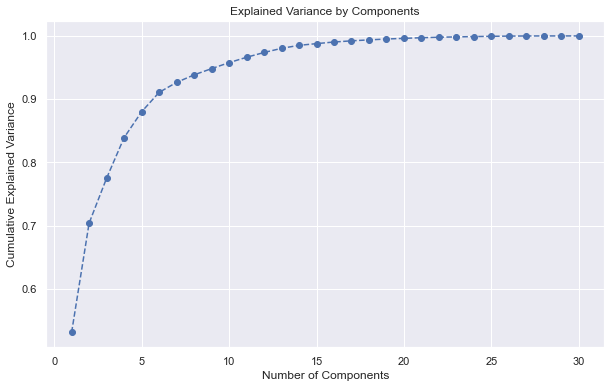

In [392]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# sns.set()

data = pd.read_csv('data.csv')
data = data.select_dtypes(include=[np.number])
data = data.drop(['id', 'Unnamed: 32'], axis=1)


scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data)


pca = PCA()

pca.fit(scaler_data)

pca.explained_variance_ratio_

# show the variance ratio
plt.figure(figsize=(10,6))
plt.plot(range(1,31), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [394]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(data.columns) + 1)],
    index=data.columns
)
# show the loadings
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
radius_mean,0.139688,-0.085818,-0.012541,0.007887,0.000094,0.002866,-0.000241,-0.003784,0.007658,-0.017111,...,-0.001560,-0.003059,0.001011,-0.001046,-0.001595,0.002210,-0.001424,8.690622e-04,0.000836,-1.360244e-03
texture_mean,0.055535,-0.019395,0.126098,-0.006603,-0.003652,-0.001910,0.002282,-0.000515,-0.019706,-0.014155,...,-0.007106,0.001606,-0.000652,-0.000527,0.000764,-0.000339,-0.000331,1.689702e-05,-0.000050,-5.944986e-07
perimeter_mean,0.145372,-0.078354,-0.012500,0.009160,0.000672,0.002604,0.000743,-0.005475,0.008176,-0.016851,...,-0.001460,-0.002622,0.000115,-0.000395,0.000167,0.001139,-0.001671,3.200545e-04,0.001531,1.324305e-03
area_mean,0.124618,-0.075897,-0.010897,0.015626,-0.005057,-0.000831,0.008415,0.000951,0.006087,-0.007320,...,0.001918,0.004131,0.000076,0.003127,0.000235,-0.002761,0.005647,-1.331621e-03,-0.001884,7.380531e-05
smoothness_mean,0.063142,0.065643,-0.026131,-0.006973,-0.065488,-0.032074,-0.006651,-0.016131,0.005491,-0.004596,...,-0.001540,0.000490,0.000237,-0.000740,0.001948,0.000109,0.000501,2.852772e-05,-0.000015,1.231704e-05
compactness_mean,0.138377,0.070251,-0.008450,0.005592,0.005629,-0.000991,0.012401,-0.021141,0.005351,-0.018330,...,-0.004106,0.005974,-0.006787,-0.000908,-0.002455,-0.002060,0.001121,-1.740560e-05,-0.000162,-8.886203e-05
concavity_mean,0.173787,0.037376,-0.003988,0.024529,0.018482,-0.005582,-0.013789,-0.010252,0.011241,0.024562,...,0.002284,0.003709,0.002239,-0.002254,0.007321,0.005680,0.000986,1.729914e-04,-0.000024,-4.352616e-05
concave_points_mean,0.185622,-0.002730,-0.018209,0.015359,-0.017222,-0.010372,-0.016025,-0.022242,0.007919,-0.003945,...,0.006374,-0.004386,0.000471,0.002208,-0.005757,-0.004270,-0.001644,3.567841e-08,-0.000022,1.814203e-06
symmetry_mean,0.064142,0.069331,-0.009000,0.012070,-0.050029,0.066421,-0.009040,-0.024006,-0.037894,0.003190,...,0.002703,-0.000315,0.000904,-0.000384,0.000022,-0.000072,-0.000171,1.675660e-05,-0.000037,3.003475e-06
fractal_dimension_mean,0.024923,0.133462,-0.005875,0.012369,-0.004940,-0.018314,0.038051,-0.022280,-0.001070,-0.003966,...,-0.001786,-0.004948,0.003364,0.002022,-0.000853,0.001651,-0.000920,-6.810566e-05,0.000026,1.036314e-05


In [396]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaler_data)
pca_data

array([[ 1.38702121,  0.42689533],
       [ 0.46230825, -0.55694674],
       [ 0.95462147, -0.10970115],
       ...,
       [ 0.22631131, -0.28794577],
       [ 1.67783369,  0.33594595],
       [-0.90506804, -0.10410875]])

In [397]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(scaler_data)
    wcss.append(kmeans.inertia_)

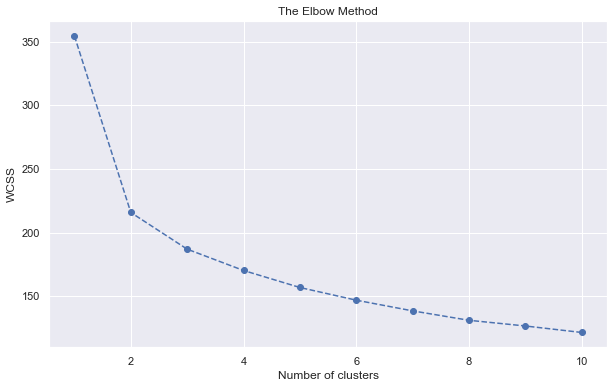

In [398]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


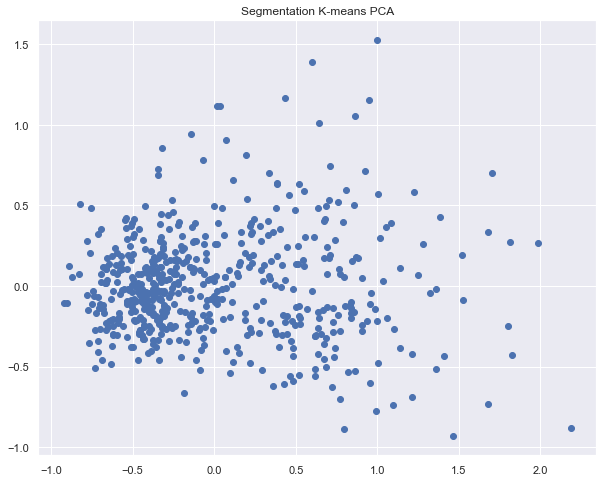

In [399]:
plt.figure(figsize=(10,8))
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.title('Segmentation K-means PCA')
plt.show()

**Exercice 6**: Grâce à l'extrait de code suivant affichez un bar plot de l'influence de chaque colonne sur le PC1 puis sur le PC2.       
Quelles sont donc les 2 colonnes ayant le plus d'importance ? 

In [400]:
print(x_axis)

     component_1  component_2
0       2.750622     1.937015
1      -0.243890     0.281190
2       1.152255     0.201391
3       6.046041     4.935010
4      -0.868353    -0.397100
..           ...          ...
564    -1.360158    -0.709091
565    -0.531855    -0.973978
566    -1.104549    -0.318409
567     1.919083     2.219635
568    -0.048138    -0.751207

[569 rows x 2 columns]


Exercice 6: Grâce à l'extrait de code suivant affichez un bar plot de l'influence de chaque colonne sur le PC1 puis sur le PC2.
Quelles sont donc les 2 colonnes ayant le plus d'importance ?

PC1 = concave_point_mean
PC2 = fractal_dimension_mean

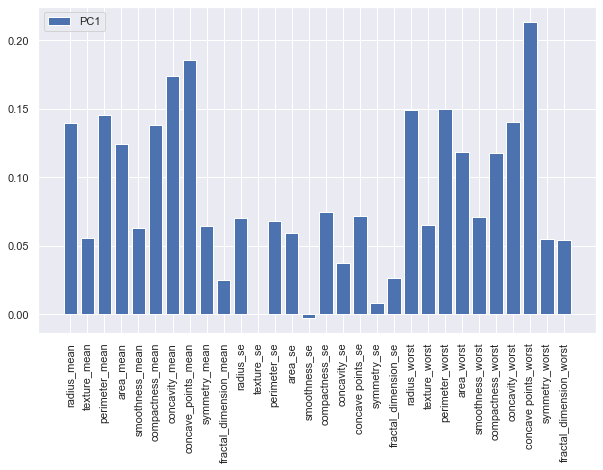

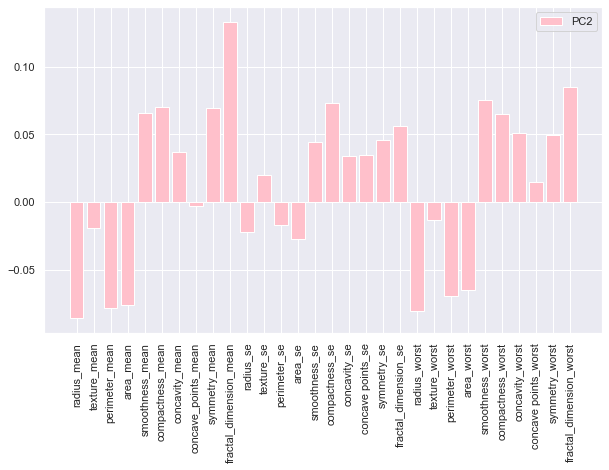

In [401]:
# # show the loadings pc1 and pc2 on a bar graph
# loadings[['PC1', 'PC2']].plot(kind='bar', figsize=(10,6))
# plt.title('Loadings for PC1 and PC2')
# plt.show()

plt.figure(figsize=(10,6))
plt.bar(loadings.index, loadings['PC1'], label='PC1')

plt.xticks(rotation=90)
plt.legend()
plt.show()

# do the PCA2 in orange
plt.figure(figsize=(10,6))
plt.bar(loadings.index, loadings['PC2'], label='PC2', color='pink')

plt.xticks(rotation=90)
plt.legend()



In [402]:
# loadings = pd.DataFrame(
#     data=pca.components_.T * np.sqrt(pca.explained_variance_), 
#     columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
#     index=X.columns
# )
# # show the loadings
# loadings

Avant de pouvoir entrainer un algorithme de K-means sur nos données isues de PCA nous voulons tout de même confirmer que nos pC1 et PC2 nous permettent d'exprimer la majoriter de la variance de notre dataset.
Pour cela nous pouvons creer un "scree plot". Un scree plot est un diagramme qui exprime la quantité de variance exprimée pour chaqune des composantes principales.

**Exercice 7:** Creez un scree plot de nos composantes principales. L'attribut `explained_variance_ratio_` de notre objet pca pourra être utile.         
Est-ce que se concentrer sur les 2 premières PC est suffisant ?

**Exercice 8:** Appliquez une PCA en précisant le nombre de composantes principales voulues (`n_components`).     
Puis ensuite entrainez un algorithme K-means sur vos données issues de la PCA. 
Avez vous séléctionné le bon nombre de clusters grâce à l'elbow method ? 
Présentez un scatterplot montrant les clusters que l'agorithme à identifié ainsi que les centroides des clusters.    Présentez également les paramètres utilisés pour entrainer le modèle.    

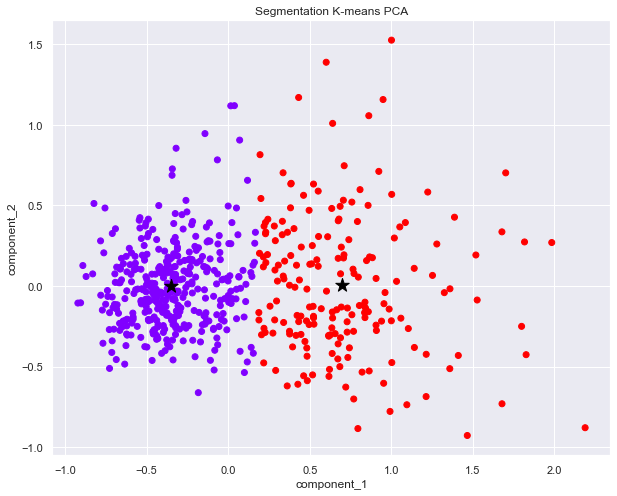

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaler_data)
pca_data

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_data)

plt.figure(figsize=(10,8))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker='*', s=200)
plt.title('Segmentation K-means PCA')

plt.xlabel('component_1')
plt.ylabel('component_2')
plt.title('Segmentation K-means PCA')

plt.show()


## Partie 4 - Evaluation
Comme nous sommes dans un cas particulier ou nous avons des données labélisées à l'originie, nous pouvons évaluer la performance de nos clustering. 

**Exercice 9:** Comparez le scatter plot issu de l'exercice 2 vs. le scatterplot des donnés avec leur vrais labels.    
Que remarquez vous ?   
Vous pouvez également calculer l'accuracy, la confusion matrix et le F1 score du K-means issu de l'exercice 2 par rapport aux vrais labels.    
Quelles sont leur valeurs ? 

**Exercice 10:** Comparez le scatter plot issu de l'exercice 8 vs. le scatterplot des donnés avec leur vrais labels.    
Que remarquez vous ?   
Vous pouvez également calculer l'accuracy, la confusion matrix et le F1 score du K-means issu de l'exercice 8 par rapport aux vrais labels.    
Quelles sont leur valeurs ? 

**Exercice 11:** Pour conclure, quelle pipeline de clustering performe le mieux ? Le clustering de l'exercice 2 ou bien le clustering de l'exercice 9

## Bonus 

**Bonus 1:** Entrainez vos compétences algorithmiques en python et recodez l'algorithme K-means !

**Bonus 2:** Il existe bien d'autres algorithmes de clustering que l'algorithme K-means, testez ces algorithmes et trouvez le meilleur algorithme pour notre problème !        
Cet article devrait vous aider:
https://nbviewer.org/github/scikit-learn-contrib/hdbscan/blob/master/notebooks/Comparing%20Clustering%20Algorithms.ipynb